In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
infile_1=loadmat('ex8data1.mat')

In [3]:
infile_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [4]:
X=infile_1['X'].copy()
Xval=infile_1['Xval'].copy()
yval=infile_1['yval'].copy()

In [5]:
X.shape,Xval.shape,yval.shape

((307, 2), (307, 2), (307, 1))

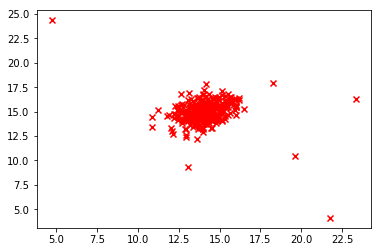

In [15]:
plt.scatter(X[:,0],X[:,1],marker='x',color='r')

In [284]:
def estimate_gaus(X):
    m=X.shape[0]
    mu=np.apply_along_axis(np.mean,0,X)
    X_centered=X-mu
    cov=X_centered.T.dot(X_centered)/m
    return mu,cov

In [285]:
mu,cov=estimate_gaus(X)

In [286]:
mu

array([ 14.11222578,  14.99771051])

In [287]:
cov

array([[ 1.83263141, -0.22712233],
       [-0.22712233,  1.70974533]])

In [288]:
def compute_gaus(X,mu,cov):
    m=X.shape[0]
    n=X.shape[1]
    denom=np.sqrt(np.power(2*np.pi,n)*np.linalg.det(cov))
    gaus_p=np.zeros(m)
    cov_inv=np.linalg.pinv(cov)
    for i in range(m):
        vec=(X[i]-mu).reshape((n,1))
        num=np.exp(-0.5*(vec.T).dot(cov_inv).dot(vec))
        gaus_p[i]=num
    gaus_p=gaus_p/denom
    return gaus_p

In [289]:
X_p=compute_gaus(X,mu,cov)

In [290]:
Xval_p=compute_gaus(Xval,mu,cov)

In [291]:
epsi_list=np.logspace(-10,1,200)

In [425]:
def compute_fscore(pred,real):
    pred_boo=pred.astype(bool)
    real_boo=real.astype(bool)
    tp=float(np.sum(np.logical_and(pred_boo,real_boo)))
    fp=float(np.sum(np.logical_and(pred_boo,~ real_boo)))
    fn=float(np.sum(np.logical_and(~ pred_boo,real_boo)))
    prec=tp/(tp+fp)
    rec=tp/(tp+fn)
    f=2*prec*rec/(prec+rec)
    print('tp',tp,'fp',fp,'fn',fn,'prec',prec,'rec',rec)
    
    return f

In [404]:
def select_epsilon(Xval,yval,mu,cov,epsi_list):
    Xval_p=compute_gaus(Xval,mu,cov)
    f_best=0.
    epsi_best=0.
    f_hist=[]
    for i in epsi_list:
        tmp=(Xval_p<i).astype(int)
        tmp=tmp.reshape(yval.shape)
        f_current = compute_fscore(tmp,yval)
        f_hist.append(f_current)
        if f_current>f_best:
            f_best=f_current
            epsi_best=i
            best_tmp=tmp
    return epsi_best,f_best,best_tmp

In [317]:
infile2=loadmat('ex8data2.mat')

In [319]:
infile2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [331]:
X2=infile2['X'].copy()
Xval2=infile2['Xval'].copy()
yval2=infile2['yval'].copy()

In [397]:
mu2,cov2=estimate_gaus(X2)

In [299]:
Xval2_p=compute_gaus(Xval2,mu2,cov2)

In [300]:
epsi_list2=np.logspace(-23,-15,1000)

In [405]:
best_epi,best_f,best_tmp=select_epsilon(Xval2,yval2,mu2,cov2,epsi_list2)

In [401]:
Xval2.shape,yval2.shape

((100, 11), (100, 1))

In [407]:
compute_fscore(best_tmp,yval2)

0.7499999999999999

In [409]:
best_eps

1.4526539259467783e-21

In [414]:
np.sum(Xval2_p<best_epi)

6

In [417]:
sum(yval2)

array([10], dtype=uint8)

In [426]:
compute_fscore(best_tmp,yval2)

tp 6.0 fp 0.0 fn 4.0 prec 1.0 rec 0.6


0.7499999999999999

In [419]:
best_tmp.shape,yval2.shape

((100, 1), (100, 1))

In [428]:
test_tmp=(Xval2_p<1.38e-18).reshape(yval2.shape)

In [429]:
sum(test_tmp)

array([18])

In [430]:
compute_fscore(test_tmp,yval2)

tp 8.0 fp 10.0 fn 2.0 prec 0.4444444444444444 rec 0.8


0.5714285714285714